Question:
- How many times do people view the item before purchase.
- what time and what day have the highest traffic of people viewing products
- what date have the most sales and least sales.
- How loyal are people to a brand. (How often the same individual repurchases an items from the same brand.)
- When the person purchased the item, what other item did the person also purchase at the same time? (using the association rules)

In [1]:
import numpy as np
import pandas as pd
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Mounted at /content/drive


In [4]:
df = pd.read_csv('2019-Oct.csv')
# df = pd.read_csv('/content/drive/My Drive/datamining/2019-Oct.csv')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
df.describe()

,product_id,category_id,price,user_id
count,4.244876e+07,4.244876e+07,4.244876e+07,4.244876e+07
mean,1.054993e+07,2.057404e+18,2.903237e+02,5.335371e+08
std,1.188191e+07,1.843926e+16,3.582692e+02,1.852374e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,3.386938e+07
25%,1.005157e+06,2.053014e+18,6.598000e+01,5.159043e+08
50%,5.000470e+06,2.053014e+18,1.629300e+02,5.296965e+08
75%,1.600030e+07,2.053014e+18,3.585700e+02,5.515788e+08
max,6.050001e+07,2.175420e+18,2.574070e+03,5.662809e+08


In [ ]:
df.count()

event_time       42448764
event_type       42448764
product_id       42448764
category_id      42448764
category_code    28933155
brand            36331684
price            42448764
user_id          42448764
user_session     42448762
dtype: int64

In [ ]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [ ]:
print(df['event_type'].nunique())
print(df['event_type'].unique())

3
['view' 'purchase' 'cart']


In [ ]:
print(df['product_id'].nunique())
print(df['category_id'].nunique())
print(df['category_code'].nunique())
print(df['brand'].nunique())
print(df['user_id'].nunique())

166794
624
126
3444
3022290


In [ ]:
event_type_percentages = df['event_type'].value_counts(normalize=True) * 100
print(event_type_percentages)

event_type
view        96.067341
cart         2.182669
purchase     1.749990
Name: proportion, dtype: float64


In [ ]:
min_spending = df['price'].min()
max_spending = df['price'].max()
avg_spending = df['price'].mean()

print(f"Minimum spending: ${min_spending:.2f}")
print(f"Maximum spending: ${max_spending:.2f}")
print(f"Average spending: ${avg_spending:.2f}")

Minimum spending: $0.00
Maximum spending: $2574.07
Average spending: $290.32


Summary of DATA:

| Property    | Description |   Type   |   Note  |
| --------    | -------     | -------- | ------- |
| event_time  | Time when event happened at (in UTC).                                                                                                                          | datetime64  | total of 42448764 time stamp   |
| event_type  | Only one kind of event: purchase.                                                                                                                              | object |  3 event type in total view = 96%, cart = 2.2% and purchase = 1.7%   |
| product_id  | ID of a product                                                                                                                                                | int64    | 166794 unique product   |
| category_id | Product's category ID                                                                                                                                          | int64    | 624 unique category ID   |
|category_code| Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories| object    |126 unique category code   |
| brand       | Downcased string of brand name. Can be missed.                                                                                                                 | object    | 3444 unique brand   |
| price     | Float price of a product. Present.                                                                                                                               | float64    |  min spend = $0.00, spend = $2547 and average spending = $290   |
| user_id| Permanent user ID.                                                                                                                                                  | int64    | 3022290 user active this month   |
| user_session | Product's category ID                                                                                                                                         | object    |    |


In [ ]:
df[['main_category', 'sub_category']] = df['category_code'].str.split('.', n=1, expand=True)
print('Split successfully')

Split successfully


In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,sub_category
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,NaN,NaN
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances,environment.water_heater
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture,living_room.sofa
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers,notebook
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics,smartphone
...,...,...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,electronics,camera.video
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8,NaN,NaN
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd,auto,accessories.player
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204,electronics,clocks


In [ ]:
new_df = df[['event_time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]
new_df

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics,camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto,accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics,clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [ ]:
mainCat_values = new_df.groupby('main_category')['product_id'].nunique().sort_values(ascending=False)
mainCat_names = mainCat_values.index
mainCat_values

main_category
electronics     14950
apparel         13417
appliances      12362
computers        7930
furniture        6972
construction     5701
kids             5123
accessories      2516
sport            2157
auto             1201
stationery        607
country_yard      185
medicine           29
Name: product_id, dtype: int64

Number of main-categories:  13


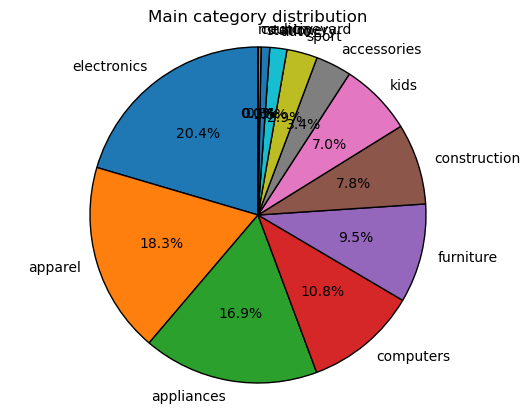

In [ ]:
print('Number of main-categories: ', len(mainCat_names))
fig, ax = plt.subplots()
ax.pie(mainCat_values, labels=mainCat_names, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Main category distribution", x=0.50)
plt.show()


In [ ]:
subCat_values = new_df.groupby('sub_category')['product_id'].nunique().sort_values(ascending=False)
subCat_names = subCat_values.index
subCat_values

sub_category
clocks                     7788
shoes                      6156
shoes.keds                 2262
toys                       2138
audio.headphone            2134
                           ... 
shoes.espadrilles             7
furniture.hammok              6
accessories.anti_freeze       4
furniture.bench               4
tools.soldering               2
Name: product_id, Length: 126, dtype: int64

In [ ]:
new_df['event_time'] = pd.to_datetime(new_df['event_time'])
new_df['date'] = pd.to_datetime(new_df['event_time'].dt.date)
new_df['time'] = new_df['event_time'].dt.time
new_df['weekday'] = new_df['date'].dt.weekday

/var/folders/hv/0mg1x66j16ldl69jbflkvgvm0000gn/T/ipykernel_36312/2446899979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['event_time'] = pd.to_datetime(new_df['event_time'])
/var/folders/hv/0mg1x66j16ldl69jbflkvgvm0000gn/T/ipykernel_36312/2446899979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['event_time'].dt.date)


In [ ]:
new_df.drop('event_time', axis='columns')
new_df = new_df[['date', 'weekday', 'time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]
new_df.head(5)

,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01,1,00:00:00,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01,1,00:00:00,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01,1,00:00:01,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01,1,00:00:01,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01,1,00:00:04,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [ ]:
new_df['date'] = new_df['date'].astype(str)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   weekday        int32  
 2   time           object 
 3   event_type     object 
 4   product_id     int64  
 5   category_id    int64  
 6   main_category  object 
 7   sub_category   object 
 8   brand          object 
 9   price          float64
 10  user_id        int64  
 11  user_session   object 
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 3.6+ GB


/var/folders/hv/0mg1x66j16ldl69jbflkvgvm0000gn/T/ipykernel_36312/1163371182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['date'].astype(str)


In [ ]:
new_df['hour'] = new_df['time'].apply(lambda t: t.hour)


In [ ]:
event_types = ['view', 'cart', 'purchase']

event_by_hour = {}
for event_type in event_types:
    event_count = new_df[new_df.event_type == event_type].groupby("hour")["event_type"].count()
    event_by_hour[event_type] = event_count

event_by_hour = pd.DataFrame(event_by_hour)

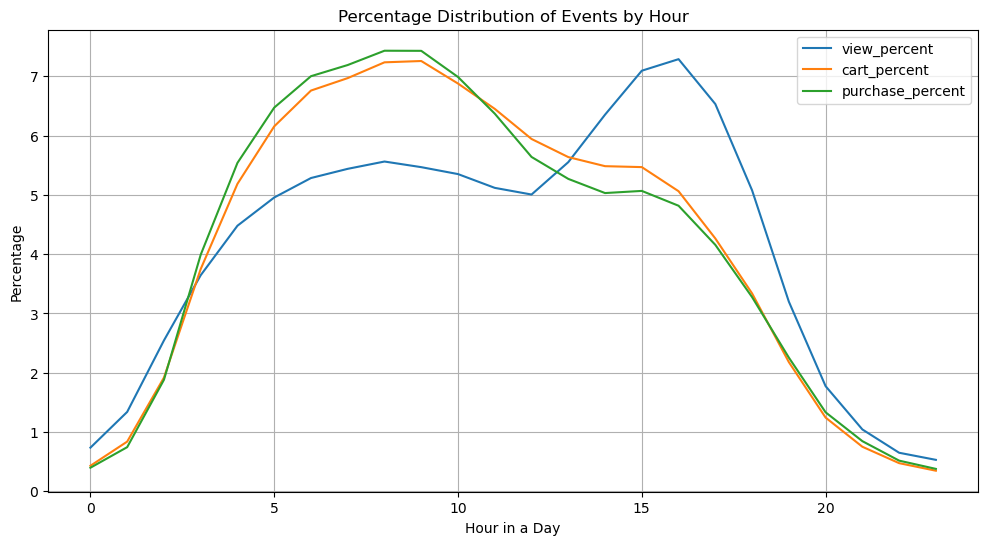

In [ ]:
for event_type in event_types:
    event_by_hour[f'{event_type}_percent'] = event_by_hour[event_type] / event_by_hour[event_type].sum() * 100

# Line plot
plt.figure(figsize=(12, 6))
for event_type in event_types:
    plt.plot(event_by_hour.index, event_by_hour[f'{event_type}_percent'], label=f'{event_type}_percent')

plt.title("Percentage Distribution of Events by Hour")
plt.xlabel("Hour in a Day")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
order_per_weekday = new_df[new_df.event_type == "purchase"].groupby("weekday")["event_type"].count().reset_index()
order_per_weekday.head(10)



,weekday,event_type
0,0,96062
1,1,114510
2,2,119159
3,3,113664
4,4,103044
5,5,96177
6,6,100233


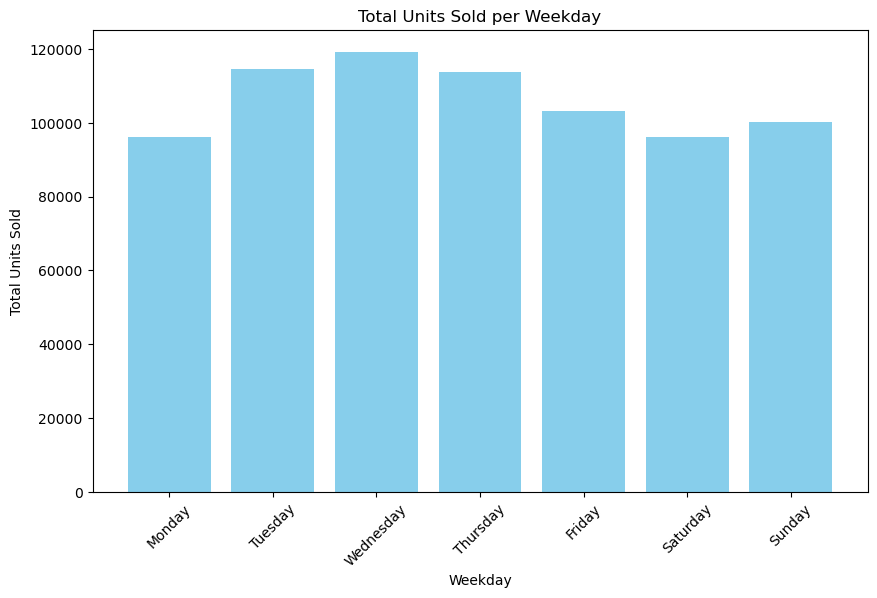

In [ ]:
# Calculate total units sold per weekday
order_per_weekday = new_df[new_df.event_type == "purchase"].groupby("weekday")["event_type"].count().reset_index()

# Map weekday numbers to names
weekday_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
order_per_weekday['weekday'] = order_per_weekday['weekday'].map(weekday_names)

# Plot the total units sold per weekday
plt.figure(figsize=(10, 6))
plt.bar(order_per_weekday['weekday'], order_per_weekday['event_type'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold per Weekday')
plt.xticks(rotation=45)
plt.show()


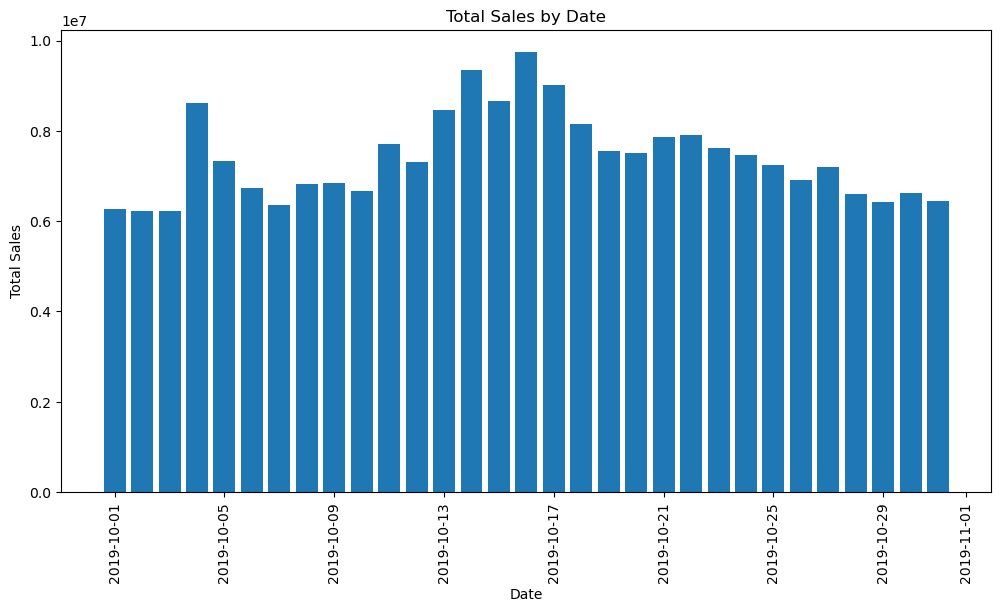

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['date'] = df['event_time'].dt.date
purchase_df = df[df['event_type'] == 'purchase']
daily_sales = purchase_df.groupby('date')['price'].sum().reset_index()

plt.figure(figsize=(12,6))
bars = plt.bar(daily_sales['date'], daily_sales['price'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.xticks(rotation=90)


plt.show()


In [ ]:
most_sales_date = daily_sales.loc[daily_sales['price'].idxmax()]
min_sales_date = daily_sales.loc[daily_sales['price'].idxmin()]

print(f"Most sales: {most_sales_date['date']}: {most_sales_date['price']}")
print(f"Least sales: {min_sales_date['date']}: {min_sales_date['price']}")

Most sales: 2019-10-16: 9747239.24
Least sales: 2019-10-02: 6213628.53


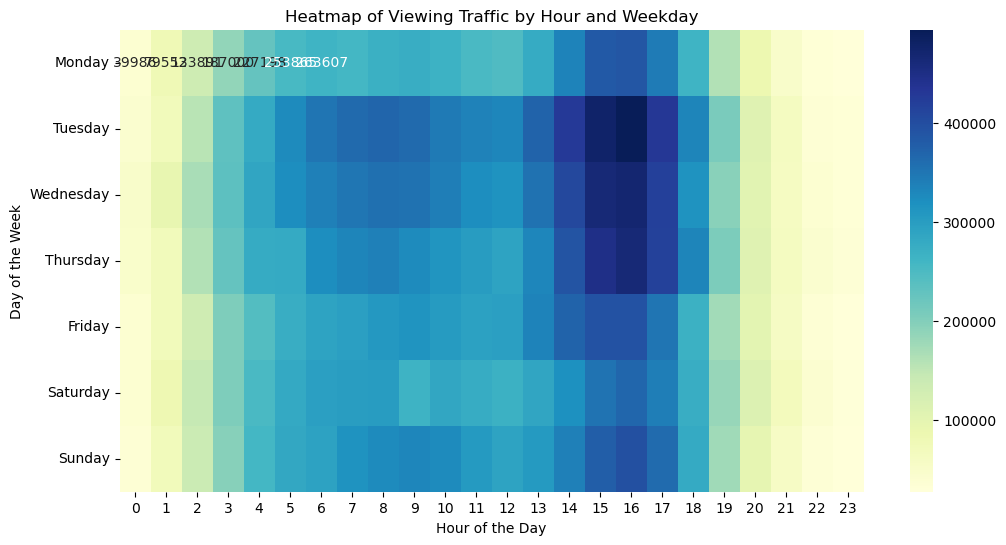

In [ ]:
import seaborn as sns

view_counts = new_df[new_df['event_type'] == 'view'].groupby(['weekday', 'hour']).size().unstack()

# Map weekday numbers to names
weekday_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
view_counts.index = view_counts.index.map(weekday_names)

plt.figure(figsize=(12,6))
sns.heatmap(view_counts,cmap="YlGnBu",annot=True, fmt="d")
plt.title('Heatmap of Viewing Traffic by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


Q:How many times do people view the item before purchase?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')
# Load the dataset (replace with your file path if needed)
data = pd.read_csv(r"C:\Users\Asuss\Downloads\2019-Oct.csv\2019-Oct.csv")


In [7]:
data[['main_category', 'sub_category']] = data['category_code'].str.split('.', n=1, expand=True)
print('Split successfully')



Split successfully


In [8]:
new_df = data[['event_time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]
#newdata.head(5)
new_df['event_time'] = pd.to_datetime(new_df['event_time'])
new_df['date'] = pd.to_datetime(new_df['event_time'].dt.date)
new_df['time'] = new_df['event_time'].dt.time
new_df['weekday'] = new_df['date'].dt.weekday
new_df.drop('event_time', axis='columns')
new_df = new_df[['date', 'weekday', 'time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]

C:\Users\Asuss\AppData\Local\Temp\ipykernel_45760\920049808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['event_time'] = pd.to_datetime(new_df['event_time'])


In [ ]:

# Sort by user_id, product_id, and time to maintain event order
data = new_df.sort_values(['user_id', 'product_id', 'time'])

# Initialize a dictionary to store total views per purchase for each product
product_view_counts = {}

# Iterate through each user and product pair
for (user_id, product_id), group in data.groupby(['user_id', 'product_id']):
    view_count = 0
    purchase_count = 0

    for _, row in group.iterrows():
        if row['event_type'] == 'view':
            view_count += 1
        elif row['event_type'] == 'purchase':
            purchase_count += 1

            # Store view count for this purchase
            if product_id not in product_view_counts:
                product_view_counts[product_id] = []

            product_view_counts[product_id].append(view_count)

            # Reset view count after purchase for the next cycle
            view_count = 0

# Calculate the average views per purchase for each product
average_views_per_product = {
    product: sum(views) / len(views) for product, views in product_view_counts.items()
}

# Create a pie chart to visualize the average views per purchase for each product
plt.figure(figsize=(10, 8))
plt.pie(
    average_views_per_product.values(),
    labels=[f'Product {p}' for p in average_views_per_product.keys()],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Average Views per Purchase for Each Product')
plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# #data = pd.read_csv('/mnt/data/EDA.ipynb')

# # Sort the dataset by user_id and product_id to maintain event order
# data = data.sort_values(['user_id', 'product_id'])

# # Initialize a dictionary to store view counts per purchase for each product
# product_view_counts = {}

# # Iterate through each user and product pair
# for (user_id, product_id), group in data.groupby(['user_id', 'product_id']):
#     view_count = 0  # Counter for views before each purchase
#     purchase_count = 0  # Track number of purchases per product

#     # Iterate through the events for the current user-product pair
#     for _, row in group.iterrows():
#         if row['event_type'] == 'view':
#             view_count += 1  # Increment the view count
#         elif row['event_type'] == 'purchase':
#             purchase_count += 1  # Increment the purchase count

#             # Store the view count for this purchase
#             if product_id not in product_view_counts:
#                 product_view_counts[product_id] = []

#             product_view_counts[product_id].append(view_count)

#             # Reset view count after a purchase for the next cycle
#             view_count = 0

# # Calculate the average views per purchase for each product
# average_views_per_product = {
#     product: sum(views) / len(views) if views else 0
#     for product, views in product_view_counts.items()
# }

# # Create a pie chart to visualize the average views per purchase for each product
# plt.figure(figsize=(10, 8))
# plt.pie(
#     average_views_per_product.values(),
#     labels=[f'Product {p}' for p in average_views_per_product.keys()],
#     autopct='%1.1f%%',
#     startangle=90
# )

# plt.title('Average Views per Purchase for Each Product')
# plt.show()
